In [2]:
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import  image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image
import os
from tensorflow.keras.applications import VGG16
 
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [19]:
def plot_network_outputs(history):
    # Extract history data
    history_dict = history.history

    # Extract loss and accuracy
    loss = history_dict['loss']
    val_loss = history_dict.get('val_loss')  # Use .get() in case it's not present
    accuracy = history_dict.get('accuracy')  # Some models use 'acc' instead of 'accuracy'
    val_accuracy = history_dict.get('val_accuracy')  # Use .get() to avoid errors

    epochs = range(1, len(loss) + 1)  # Number of epochs

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    if val_loss:
        plt.semilogy(epochs, val_loss, 'r--', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy (if available)
    if accuracy:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
        if val_accuracy:
            plt.semilogy(epochs, val_accuracy, 'r--', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.show()

In [4]:
base_dir = '/home/karolina/Documents/ML-ISS/lab3/dataset/'
 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
 
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [7]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [9]:
train_features, train_labels = extract_features(train_dir, 1992)
validation_features, validation_labels = extract_features(validation_dir, 999)
test_features, test_labels = extract_features(test_dir, 1000)

Found 1992 images belonging to 2 classes.


1/1 [==============================] - 0s 168ms/step
Found 999 images belonging to 2 classes.
1/1 [==============================] - 0s 272ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 278ms/step


In [22]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(4, 4, 512)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 2097665 (8.00 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(train_features, train_labels, batch_size=20, epochs=30, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 7ms/step - loss: 0.7273 - accuracy: 0.7691 - val_loss: 0.3375 - val_accuracy: 0.8488
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3274 - accuracy: 0.8574 - val_loss: 0.3898 - val_accuracy: 0.8258
Epoch 3/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2925 - accuracy: 0.8805 - val_loss: 0.2412 - val_accuracy: 0.8999
Epoch 4/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2423 - accuracy: 0.9011 - val_loss: 0.2637 - val_accuracy: 0.8919
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2080 - accuracy: 0.9157 - val_loss: 0.2514 - val_accuracy: 0.9069
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1848 - accuracy: 0.9227 - val_loss: 0.3096 - val_accuracy: 0.8889
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1575 - accuracy: 0.9383 - val_loss: 0.3901 - val_accuracy: 0.8809
Epoch 

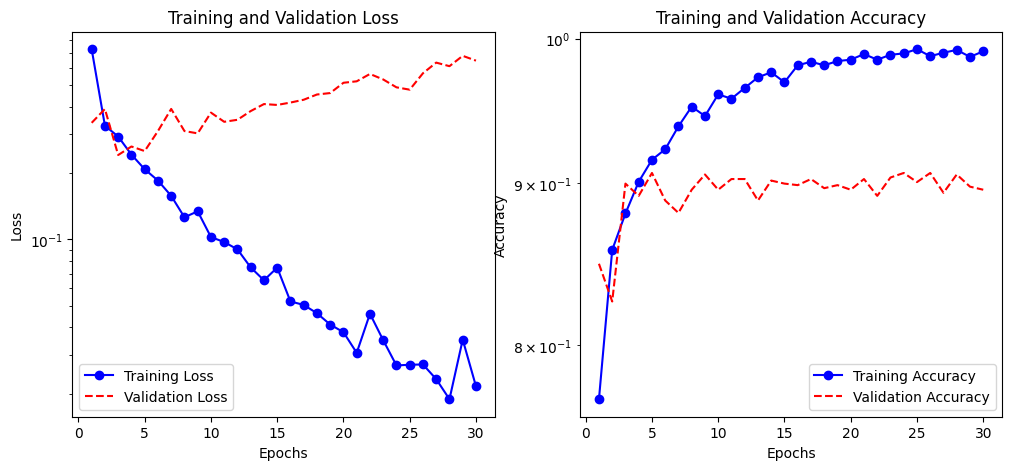

In [24]:
plot_network_outputs(history)

## Part two

Found 1992 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


Epoch 1/30
100/100 - 46s - loss: 0.7882 - acc: 0.6762 - val_loss: 0.3176 - val_acc: 0.8579 - 46s/epoch - 465ms/step
Epoch 2/30
100/100 - 54s - loss: 0.4702 - acc: 0.7731 - val_loss: 0.2769 - val_acc: 0.8869 - 54s/epoch - 539ms/step
Epoch 3/30
100/100 - 50s - loss: 0.4079 - acc: 0.8158 - val_loss: 0.3825 - val_acc: 0.8238 - 50s/epoch - 499ms/step
Epoch 4/30
100/100 - 51s - loss: 0.3764 - acc: 0.8208 - val_loss: 0.5534 - val_acc: 0.7878 - 51s/epoch - 514ms/step
Epoch 5/30
100/100 - 51s - loss: 0.3714 - acc: 0.8233 - val_loss: 0.2487 - val_acc: 0.8969 - 51s/epoch - 507ms/step
Epoch 6/30
100/100 - 51s - loss: 0.3519 - acc: 0.8394 - val_loss: 0.2670 - val_acc: 0.8859 - 51s/epoch - 513ms/step
Epoch 7/30
100/100 - 74s - loss: 0.3361 - acc: 0.8579 - val_loss: 0.2689 - val_acc: 0.8839 - 74s/epoch - 742ms/step
Epoch 8/30
100/100 - 51s - loss: 0.3367 - acc: 0.8379 - val_loss: 0.2485 - val_acc: 0.8999 - 51s/epoch - 511ms/step
Epoch 9/30
100/100 - 78s - loss: 0.3402 - acc: 0.8514 - val_loss: 0.2549

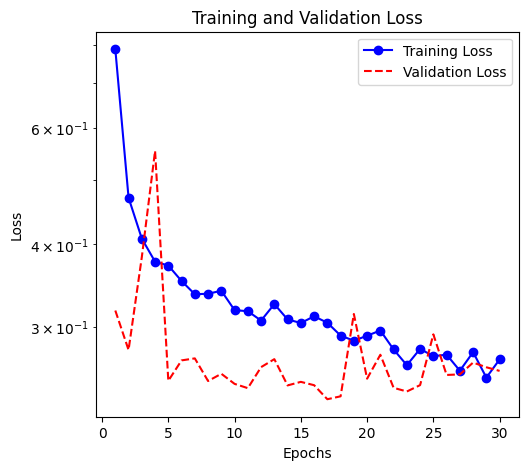

In [27]:
from keras import optimizers

model_2 = models.Sequential()
model_2.add(conv_base)
model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
 
model_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
 
history_2 = model_2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

plot_network_outputs(history_2)

## Part three - finetuning

In [29]:
conv_base.trainable = True
 
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
 
history = model_2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100


/tmp/ipykernel_7551/3257406631.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_2.fit_generator(


100/100 [==============================] - 40s 393ms/step - loss: 15.6774 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.4995
Epoch 2/100
100/100 [==============================] - 41s 410ms/step - loss: 0.8815 - acc: 0.5472 - val_loss: 0.6330 - val_acc: 0.7477
Epoch 3/100
100/100 [==============================] - 41s 412ms/step - loss: 0.6255 - acc: 0.7068 - val_loss: 0.4858 - val_acc: 0.7377
Epoch 4/100
100/100 [==============================] - 43s 430ms/step - loss: 0.4550 - acc: 0.8097 - val_loss: 0.2574 - val_acc: 0.9039
Epoch 5/100
100/100 [==============================] - 41s 414ms/step - loss: 0.3785 - acc: 0.8439 - val_loss: 0.3003 - val_acc: 0.8689
Epoch 6/100
100/100 [==============================] - 41s 416ms/step - loss: 0.3258 - acc: 0.8670 - val_loss: 0.2497 - val_acc: 0.9179
Epoch 7/100
100/100 [==============================] - 42s 417ms/step - loss: 0.2991 - acc: 0.8820 - val_loss: 0.2161 - val_acc: 0.9149
Epoch 8/100
100/100 [==============================] - 41s 

KeyboardInterrupt: 